<a href="https://colab.research.google.com/github/JF11579/Colab/blob/main/Network_RE_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install faker
!pip install --upgrade networkx
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import squarify
import seaborn as sns
from faker import Faker

# Options

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change to the directory containing your CSV
%cd /content/drive/MyDrive/DATA/Real_Estate_Data

Mounted at /content/drive
/content/drive/MyDrive/DATA/Real_Estate_Data


In [26]:
#SC_1 = pd.read_csv('Sea_Cliff_2013.csv')
df = pd.read_csv('SeaCliff_2013_to_23.csv')

In [27]:
df.shape

(1077, 222)

In [28]:
df2 = pd.read_csv('GlnCv_GH_GWL_2023_combined_2.csv')

In [29]:
df2.shape


(2670, 221)

## Join the Sea cliff And Glen cove-glen Head- Glenwood landing data

In [30]:
data = pd.concat([df, df2])


In [31]:
data.shape

(3747, 222)

## Pre-processing

In [32]:
df = data

In [33]:
df= df.drop_duplicates(subset= 'ML#' , keep = 'first')
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df = df.dropna(subset=['Selling_Agent'])
df = df.dropna(subset=['Listing_Agent'])
df = df[['Listing_Agent' , 'Selling_Agent', 'Listing_Date']]
df['Listing_Date'] = pd.to_datetime(df['Listing_Date'])
df['Year'] = df['Listing_Date'].dt.year
df = df[df['Selling_Agent'] != df['Listing_Agent']]

<ipython-input-33-60ad122797ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)


## Annonymize the names

In [34]:
# Create a Faker instance to generate consistent fake names
fake = Faker()
Faker.seed(123)  # Set a seed for reproducibility

# Create a mapping of original names to consistent fake names
name_mapping = {}

for name in set(df['Listing_Agent'].unique()).union(df['Selling_Agent'].unique()):
    name_mapping[name] = fake.name()

# Replace the names in both columns using the mapping
df['Listing_Agent'] = df['Listing_Agent'].map(name_mapping)
df['Selling_Agent'] = df['Selling_Agent'].map(name_mapping)

# What does our data look like now?

### Agent_Count is how many listings that agent had inthe previous 10 years.

In [45]:
df.head(5)

Listing_Agent    Selling_Agent Listing_Date  Year  Agent_Count
15      Nicole Eaton      April Gomez   2013-02-25  2013           10
19     Julian Macias   Cynthia Harris   2013-03-03  2013           13
21  Jonathan Gardner  David Rodriguez   2013-03-05  2013           68
23     Michael Scott      Joseph Diaz   2013-03-12  2013           37
25      William Shaw  Jonathan Graham   2013-03-15  2013           33

## how much More do top agents make?  Keep in

# Tree plot

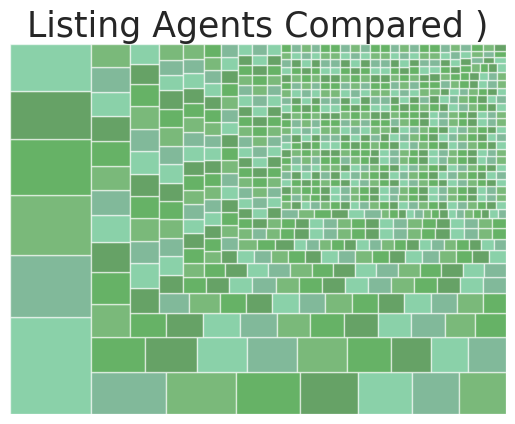

In [39]:
tree_data = df

# Filter data from the DataFrame df
ListingAgentData = tree_data['Listing_Agent'].value_counts().reset_index()
ListingAgentData.columns = ['Listing_Agent', 'counts']

# Set custom green colors
colors = ['#3CB371', '#2E8B57', '#228B22', '#008000', '#006400']

# Set seaborn plot style
sns.set_style(style="whitegrid")

# Get sizes and labels from the data
sizes = ListingAgentData['counts'].values
labels = ListingAgentData['Listing_Agent']

# Plot the treemap with Squarify
squarify.plot(sizes=sizes, label=None, alpha=0.6, color=colors).set(title='Listing Agent Treemap')

# Add text below the title
plt.title("Listing Agents Compared )", fontsize=25)
plt.text(50, 100, "", ha="center", va="top" , fontsize=20)  # Adjust the y-coordinate (-0.15) here
plt.axis('off')
plt.show()

## Lets limist our look to only those agents with 2 or more listings.

In [40]:
df['Agent_Count'] = df.groupby('Listing_Agent')['Listing_Agent'].transform('count')
df = df[df['Agent_Count'] >= 2]

In [42]:
# tree_data = df

# # Filter data from the DataFrame df
# ListingAgentData = tree_data['Listing_Agent'].value_counts().reset_index()
# ListingAgentData.columns = ['Listing_Agent', 'counts']

# # Set custom green colors
# colors = ['#3CB371', '#2E8B57', '#228B22', '#008000', '#006400']

# # Set seaborn plot style
# sns.set_style(style="whitegrid")

# # Get sizes and labels from the data
# sizes = ListingAgentData['counts'].values
# labels = ListingAgentData['Listing_Agent']

# # Plot the treemap with Squarify
# squarify.plot(sizes=sizes, label=labels, alpha=0.6, color=colors).set(title='Listing Agent Treemap')

# # Add text below the title
# plt.title("Listing Agents compared (Only Agents With More Than One Listing Displayed)", fontsize=25)
# plt.text(50, 100, "", ha="center", va="top" , fontsize=20)  # Adjust the y-coordinate (-0.15) here
# plt.axis('off')
# plt.show()

# Pie plot

Text(0.5, 1.0, 'Top Listing Agents')

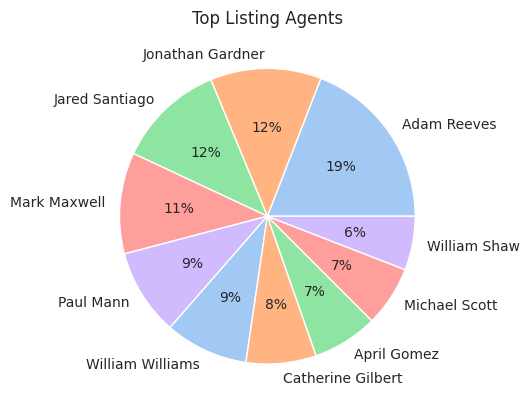

In [43]:
pie = df
# prompt: filter rows . unique. keep only first of each Listing_Agent

pie = pie.drop_duplicates(subset= 'Listing_Agent' , keep = 'first')
pie = pie.sort_values(by='Agent_Count', ascending=False)
pie = pie.head(10)
data = pie['Agent_Count']
labels = pie['Listing_Agent']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

# Add title to the chart
plt.title('Top Listing Agents')

# Displaying chart

# Network Graph

Text(0.5, 1.0, 'All Trees , No Forest')

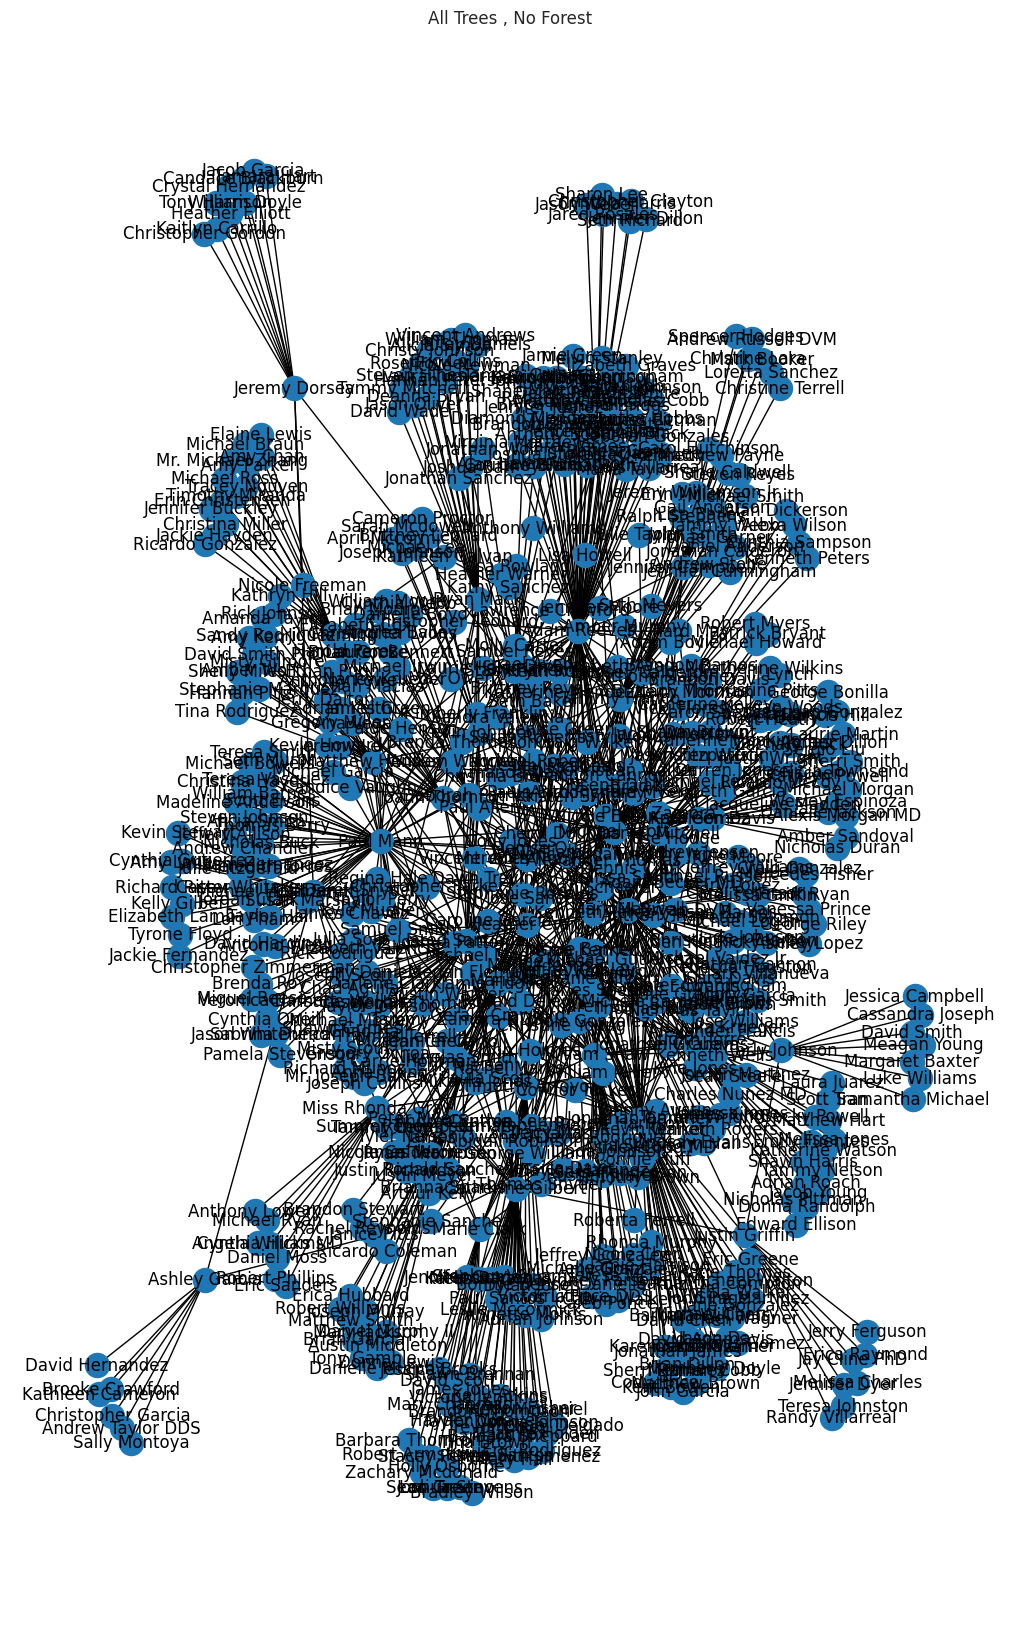

In [44]:
df = df[df['Agent_Count'] >= 10]

data = df

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')
from matplotlib.pyplot import figure
figure(figsize=(10, 16))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )

### All Forest, no trees.  we will filter out agents wqith less than 15 listinigs ini thelast 10 yrs.

Text(0.5, 1.0, 'All Trees , No Forest')

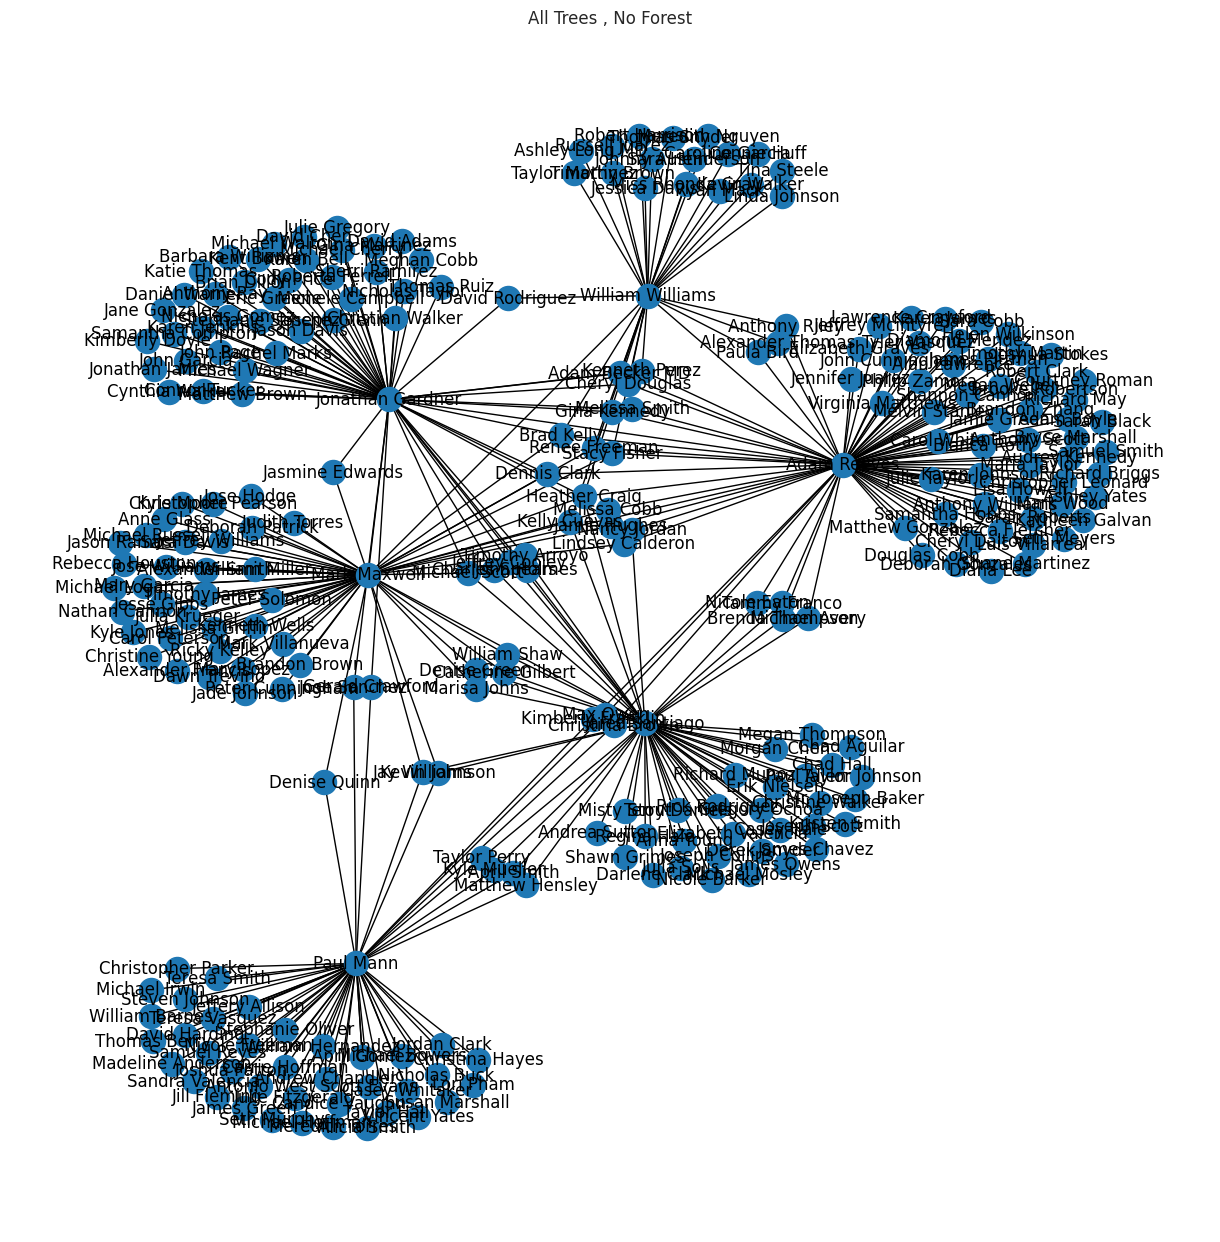

In [49]:
df = df[df['Agent_Count'] >= 50]

data = df

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(12, 12))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )

## Let us look at some individual listing agents.

## Here are teh top 10 listers

In [53]:
sorted_Lsiting_agents = df.drop_duplicates(subset=['Listing_Agent'] , keep='first')

sorted_Listing_agents = sorted_Lsiting_agents .sort_values(by=['Agent_Count'], ascending=False)
sorted_Listing_agents = sorted_Listing_agents.head(10)

sorted_Listing_agents

Listing_Agent     Selling_Agent Listing_Date  Year  Agent_Count
50        Adam Reeves    Cheryl Douglas   2013-05-06  2013          107
21   Jonathan Gardner   David Rodriguez   2013-03-05  2013           68
219    Jared Santiago     Michael Scott   2014-11-10  2014           66
39       Mark Maxwell      Denise Quinn   2013-04-15  2013           62
27          Paul Mann  Stephanie Oliver   2013-04-01  2013           53
47   William Williams       Adam Reeves   2013-04-30  2013           51

In [ ]:
Adam_Reeves = df.loc[df['Listing_Agent'] == 'Adam Reeves']

Adam_Reeves


## Now a network graph of just Adam Reeves

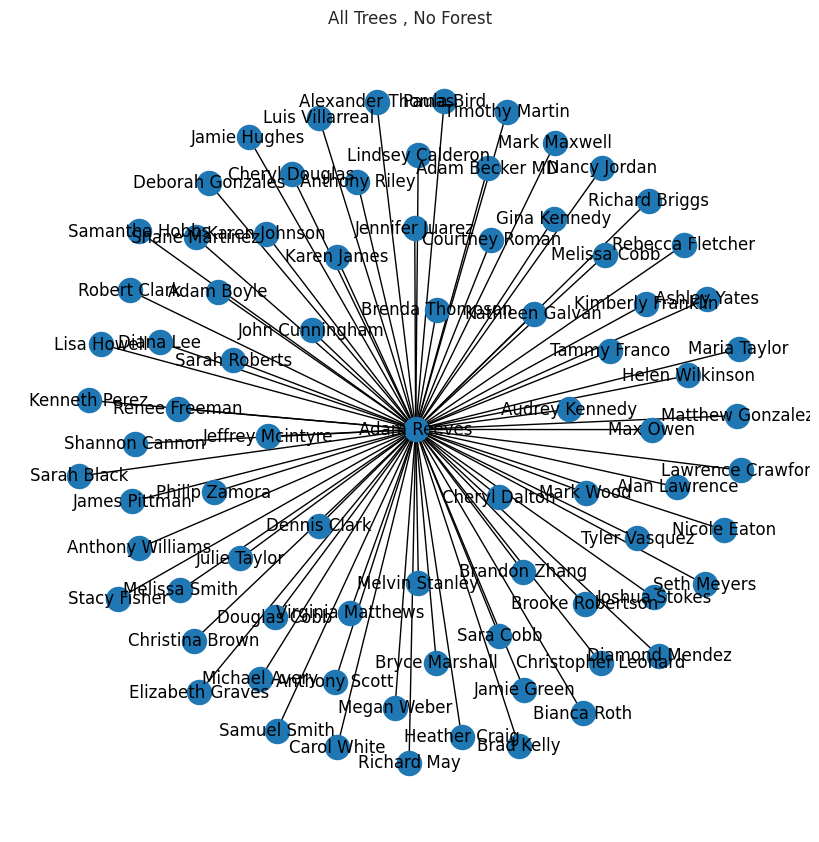

In [55]:

data = Adam_Reeves
#data

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(8, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )
plt.show()

## Jonathan Gardner

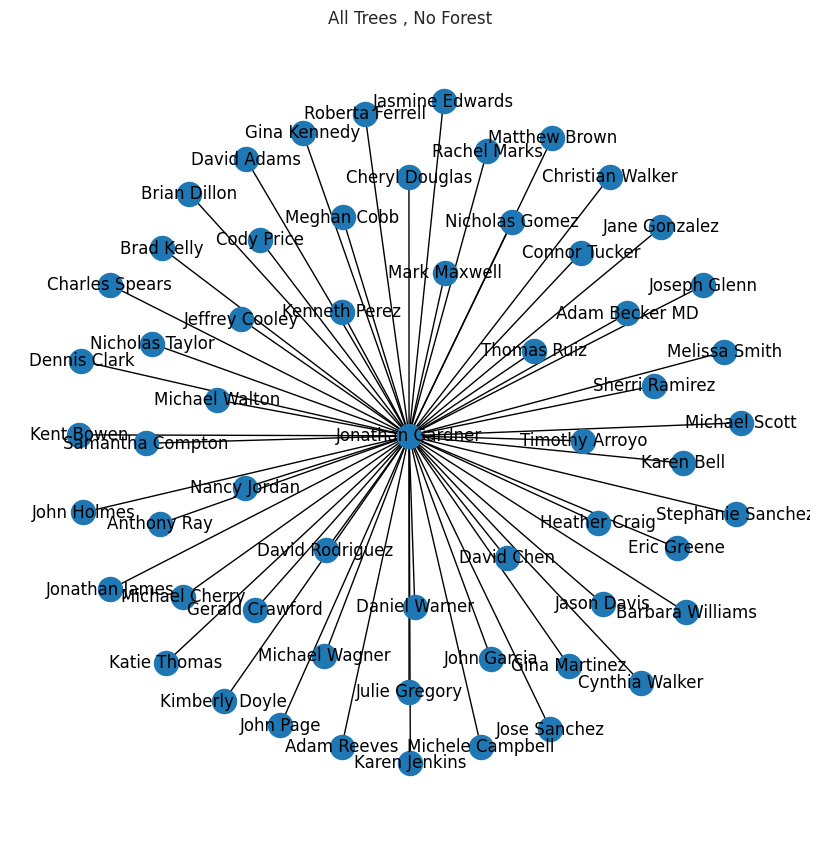

In [56]:
Jonathan_Gardner = df.loc[df['Listing_Agent'] == 'Jonathan Gardner']

data = Jonathan_Gardner
#data

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(8, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )
plt.show()

## William Williams

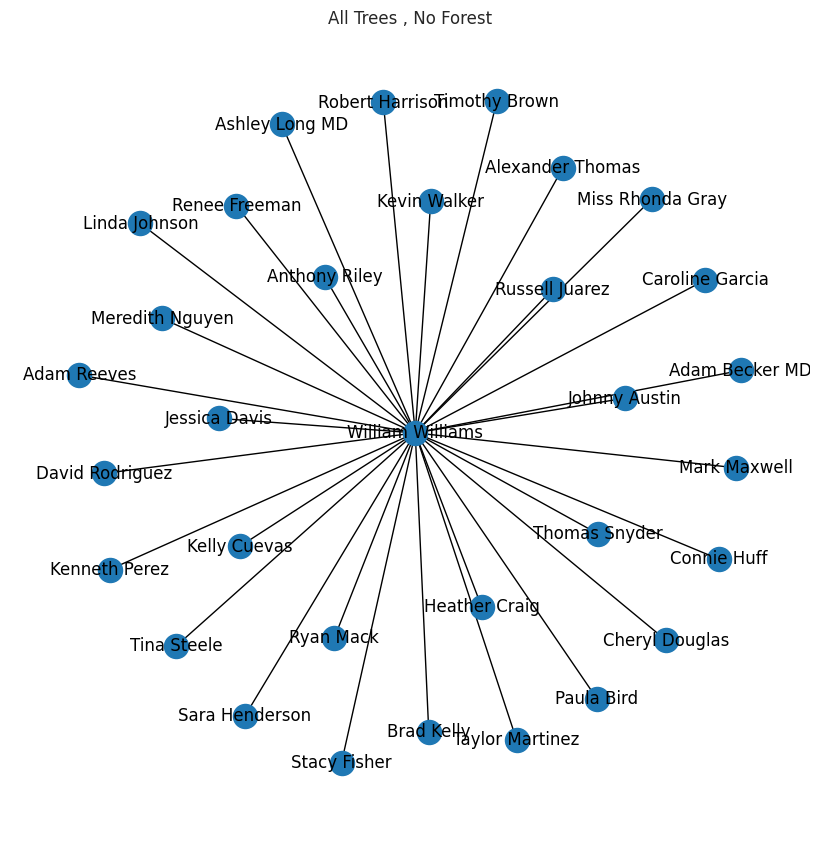

In [57]:
William_Williams = df.loc[df['Listing_Agent'] == 'William Williams']

data = William_Williams
#data

#G = nx.Graph()
G = nx.DiGraph()
G = nx.from_pandas_edgelist(data, 'Listing_Agent' , 'Selling_Agent')

# Increase the space between the nodes.
node_spacing = 2


from matplotlib.pyplot import figure
figure(figsize=(8, 8))
#nx.draw_shell(G, with_labels=True)
nx.draw(G, with_labels=True)
plt.title('All Trees , No Forest' )
plt.show()

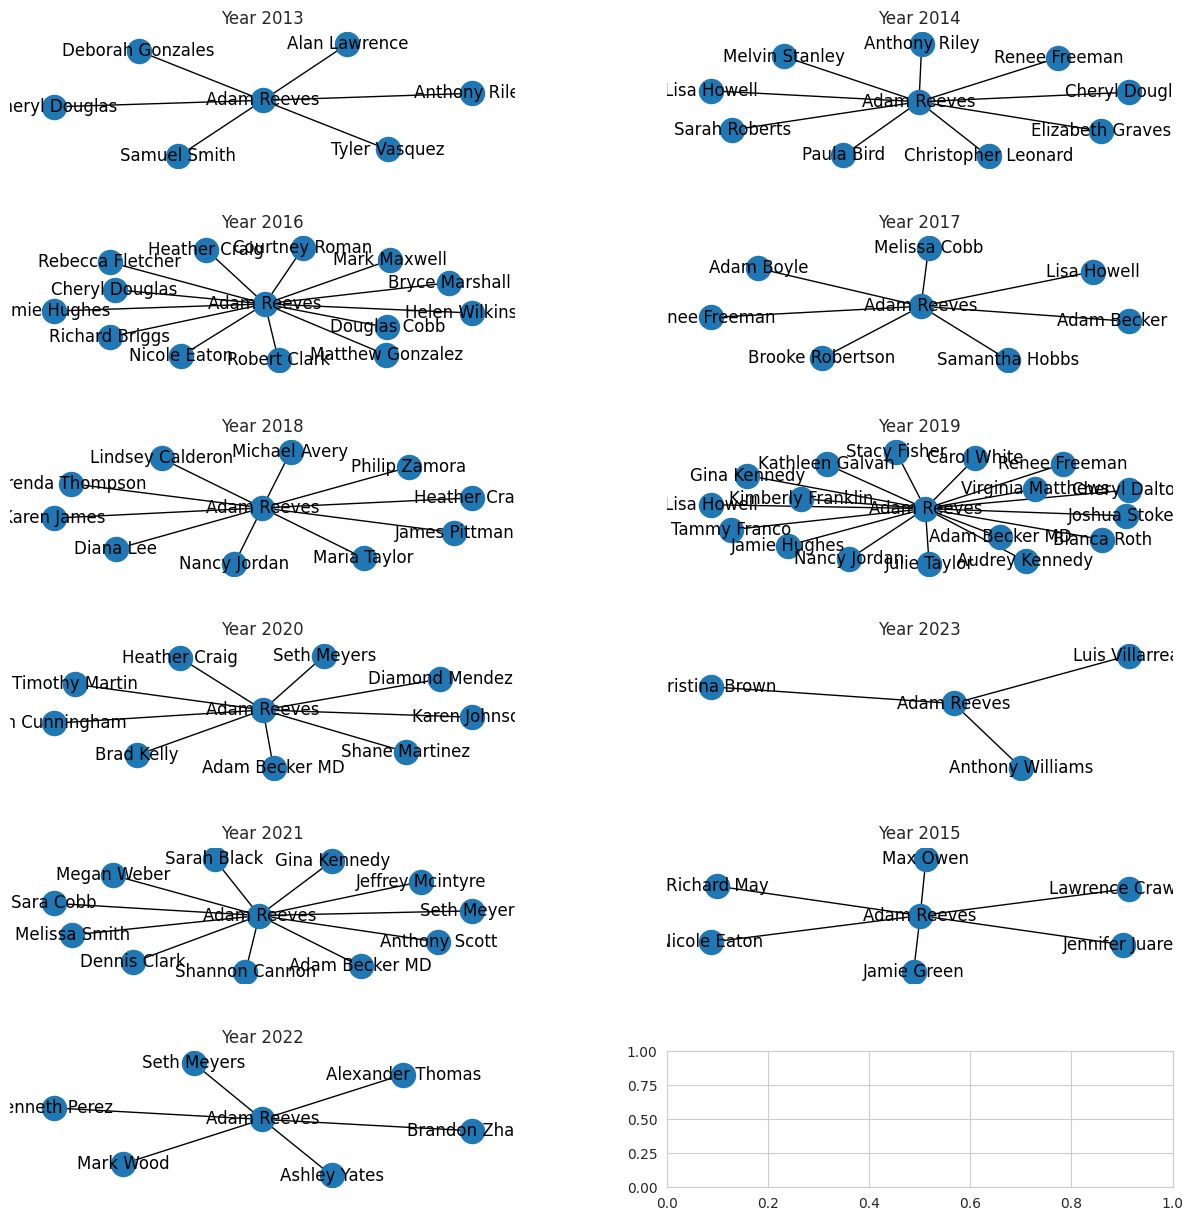

In [59]:
# import networkx as nx
# import matplotlib.pyplot as plt

# Catherine_Wilkins = df.loc[df['Listing_Agent'] == 'Catherine Wilkins']

# #
data = Adam_Reeves

# Get unique years in your data
unique_years = data['Year'].unique()

# Calculate the number of rows and columns for the grid
num_rows = (len(unique_years) + 1) // 2
num_cols = 2

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust spacing between subplots

# Loop through each year and create a plot
for i, year in enumerate(unique_years):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    # Filter the data for the current year
    year_data = data[data['Year'] == year]

    # Create a directed graph from the filtered data
    G = nx.DiGraph()
    G = nx.from_pandas_edgelist(year_data, 'Listing_Agent', 'Selling_Agent')

    # Increase the space between the nodes
    node_spacing = 2

    # Draw the graph on the current subplot
    nx.draw(G, with_labels=True, ax=ax)
    ax.set_title(f'Year {year}')

# Show the plot
plt.show()


([<matplotlib.axis.XTick at 0x7e56bb275ea0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

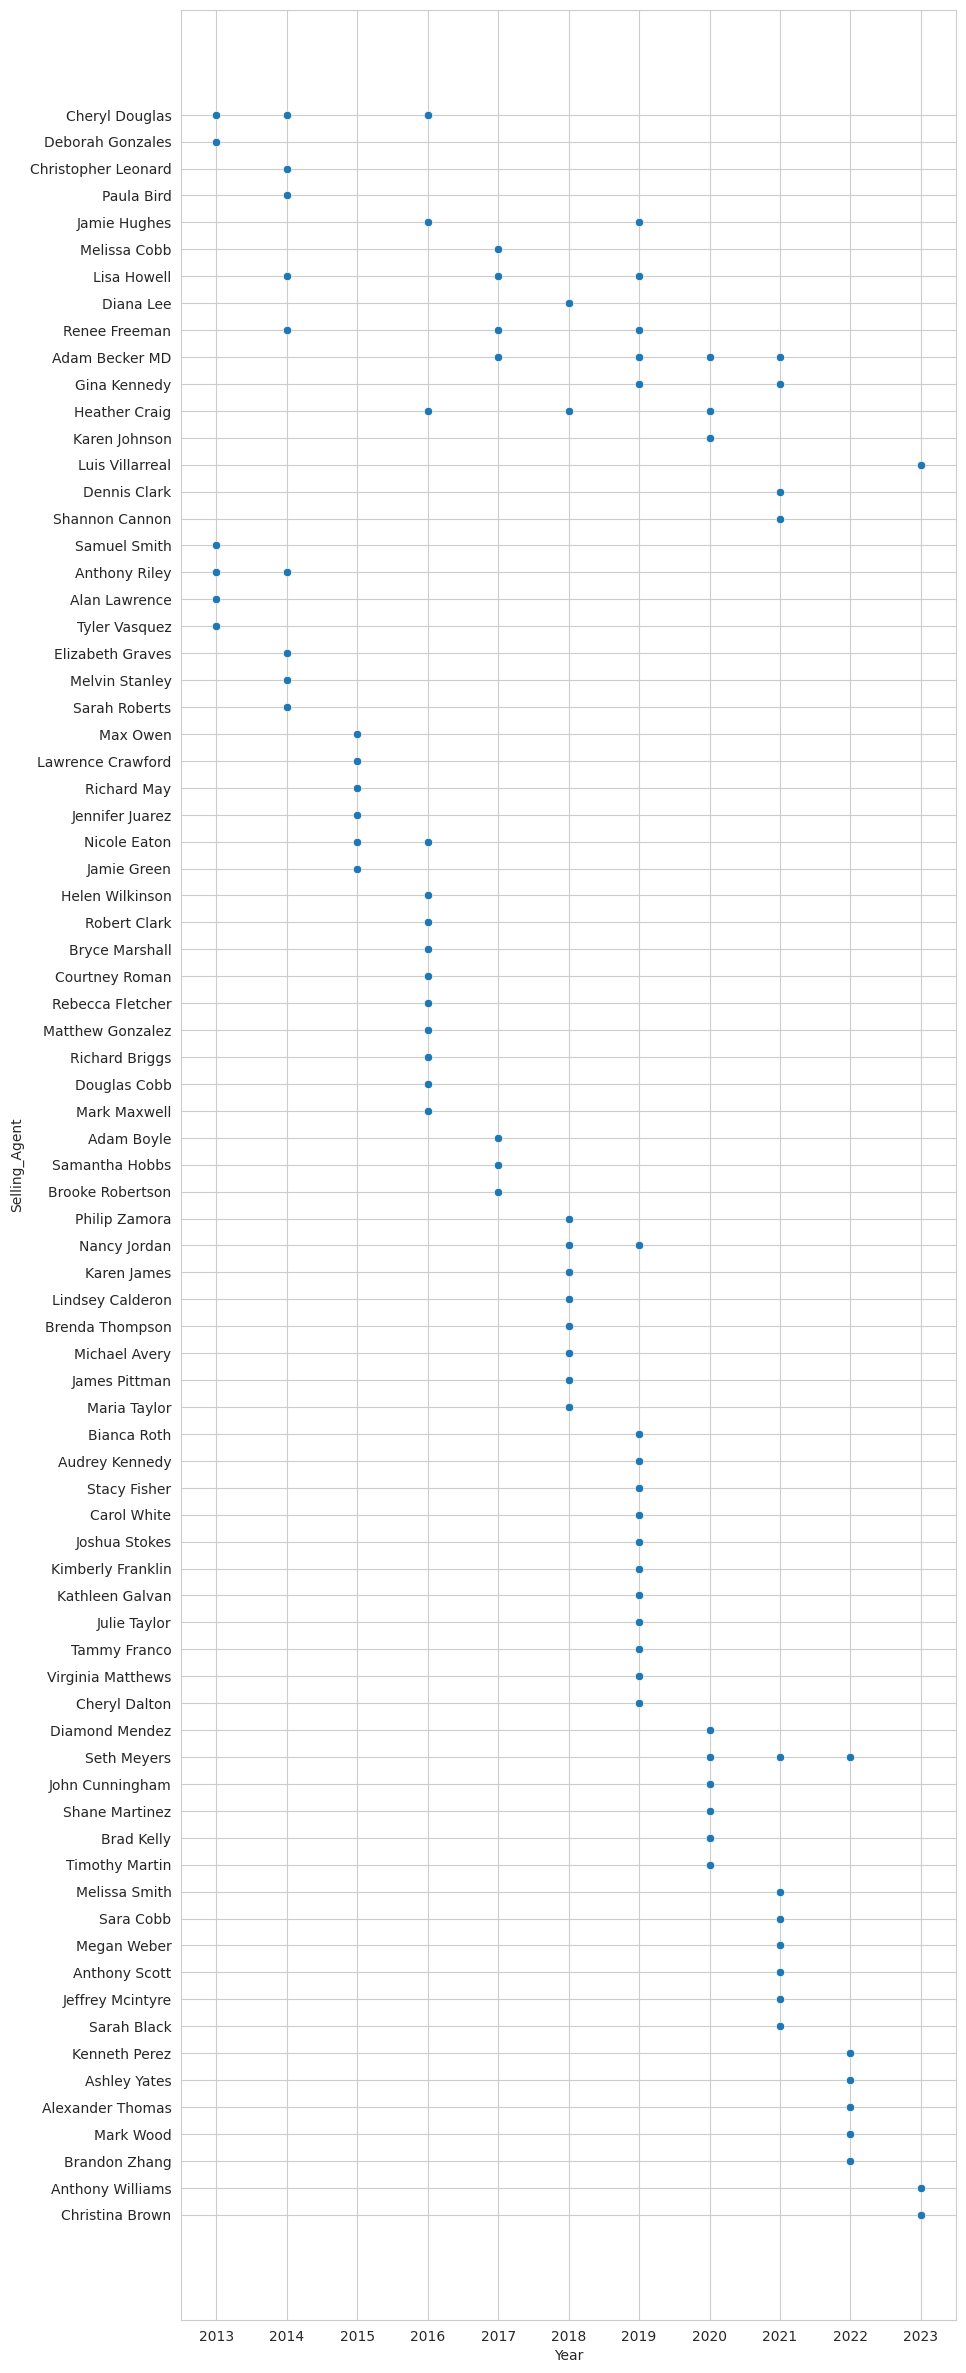

In [65]:
data = Adam_Reeves

# Create a subplot with a width of 20 inches and a height of 10 inches.
fig, ax = plt.subplots(figsize=(10, 30))

# Plot the scatterplot.
sns.scatterplot(x= 'Year', y= 'Selling_Agent', data = data, ax=ax)
plt.xticks(range(2013, 2024))

([<matplotlib.axis.XTick at 0x7e56ba1366e0>,
 [Text(2013, 0, '2013'),
  Text(2014, 0, '2014'),
  Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019'),
  Text(2020, 0, '2020'),
  Text(2021, 0, '2021'),
  Text(2022, 0, '2022'),
  Text(2023, 0, '2023')])

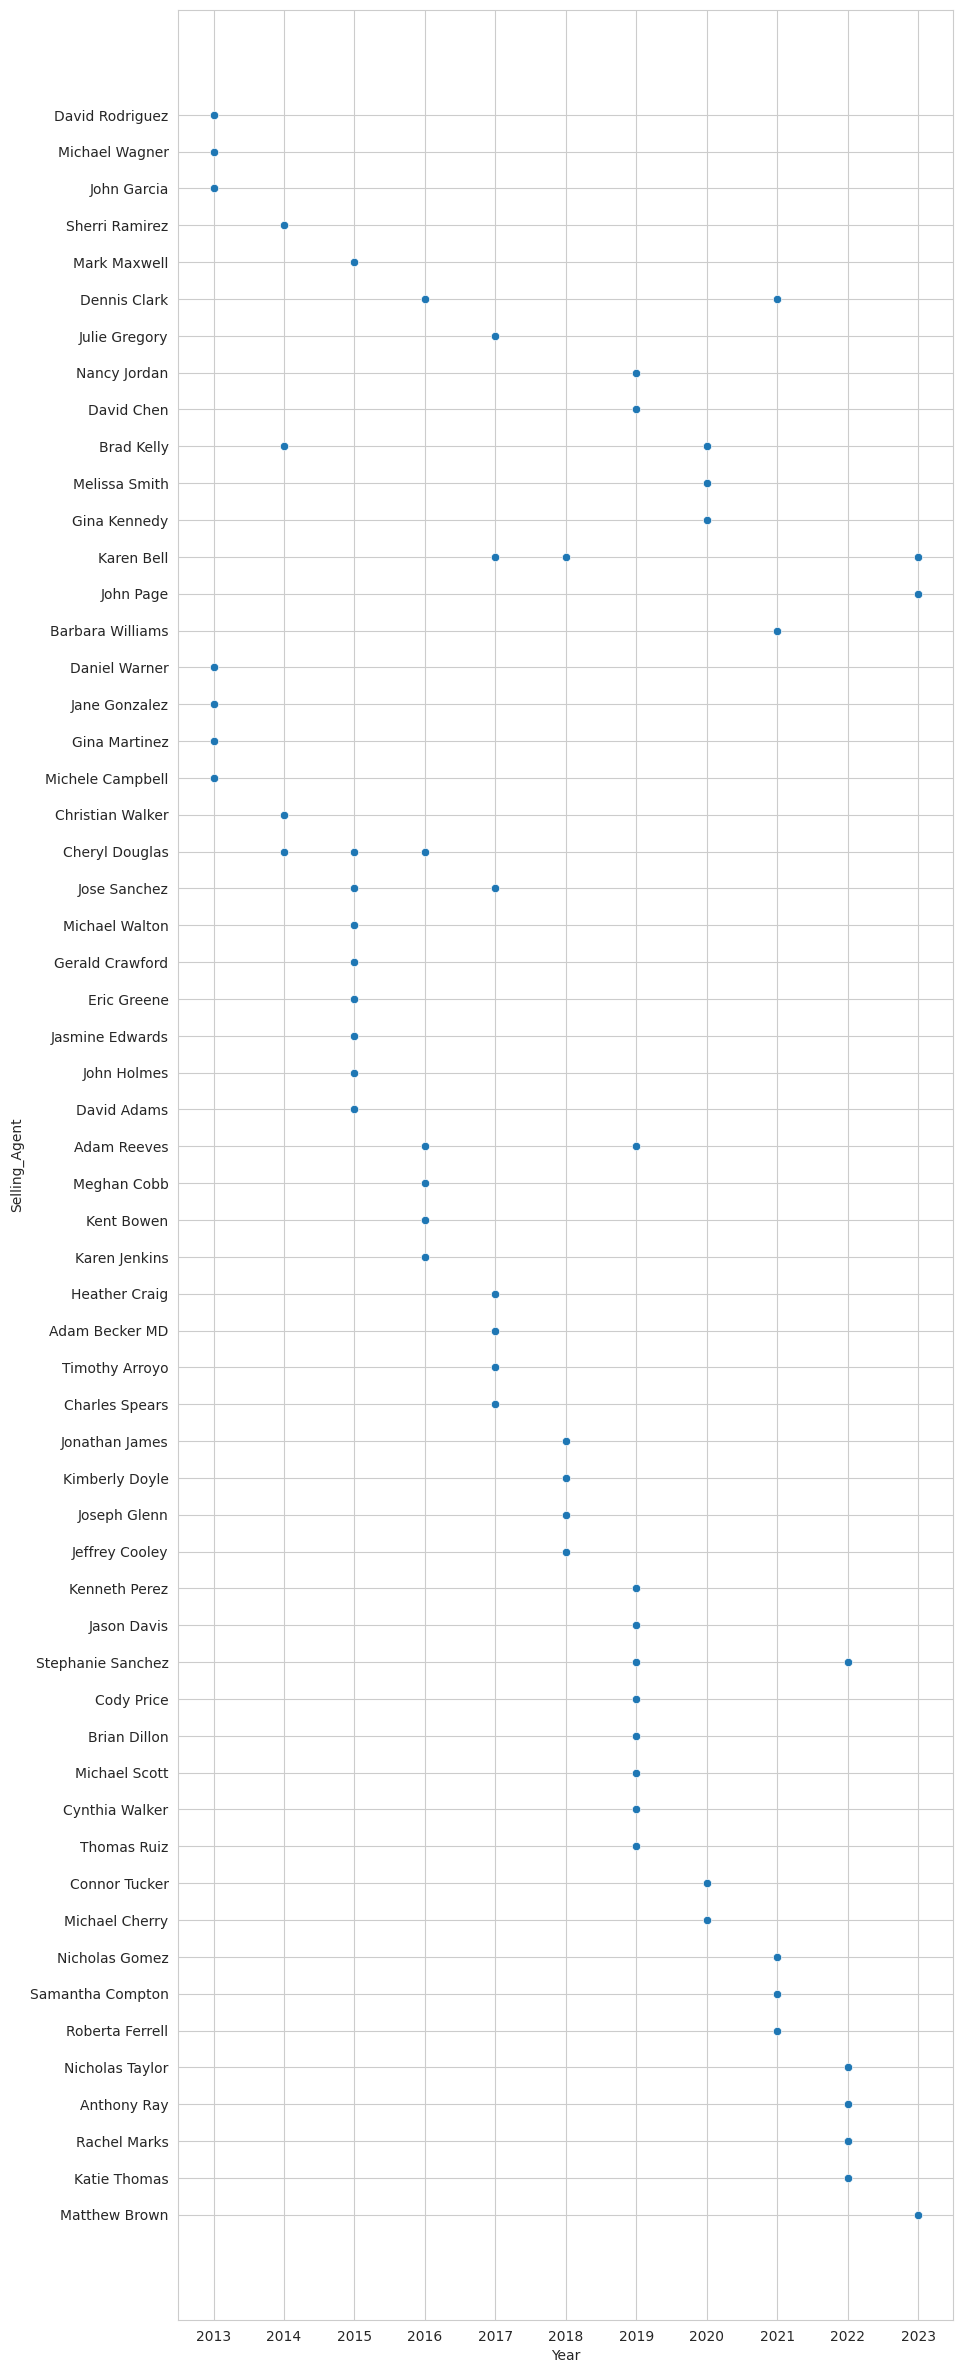

In [67]:
data = Jonathan_Gardner

# Create a subplot with a width of 20 inches and a height of 10 inches.
fig, ax = plt.subplots(figsize=(10, 30))

# Plot the scatterplot.
sns.scatterplot(x= 'Year', y= 'Selling_Agent', data = data, ax=ax)
plt.xticks(range(2013, 2024))

## Ideally we would like to have seen a straight line of dots running horizontally from several Selling Agents names.  those would have been the perfect team members for that Listing Agent.

## Let us see what happens if we combine two listing agents

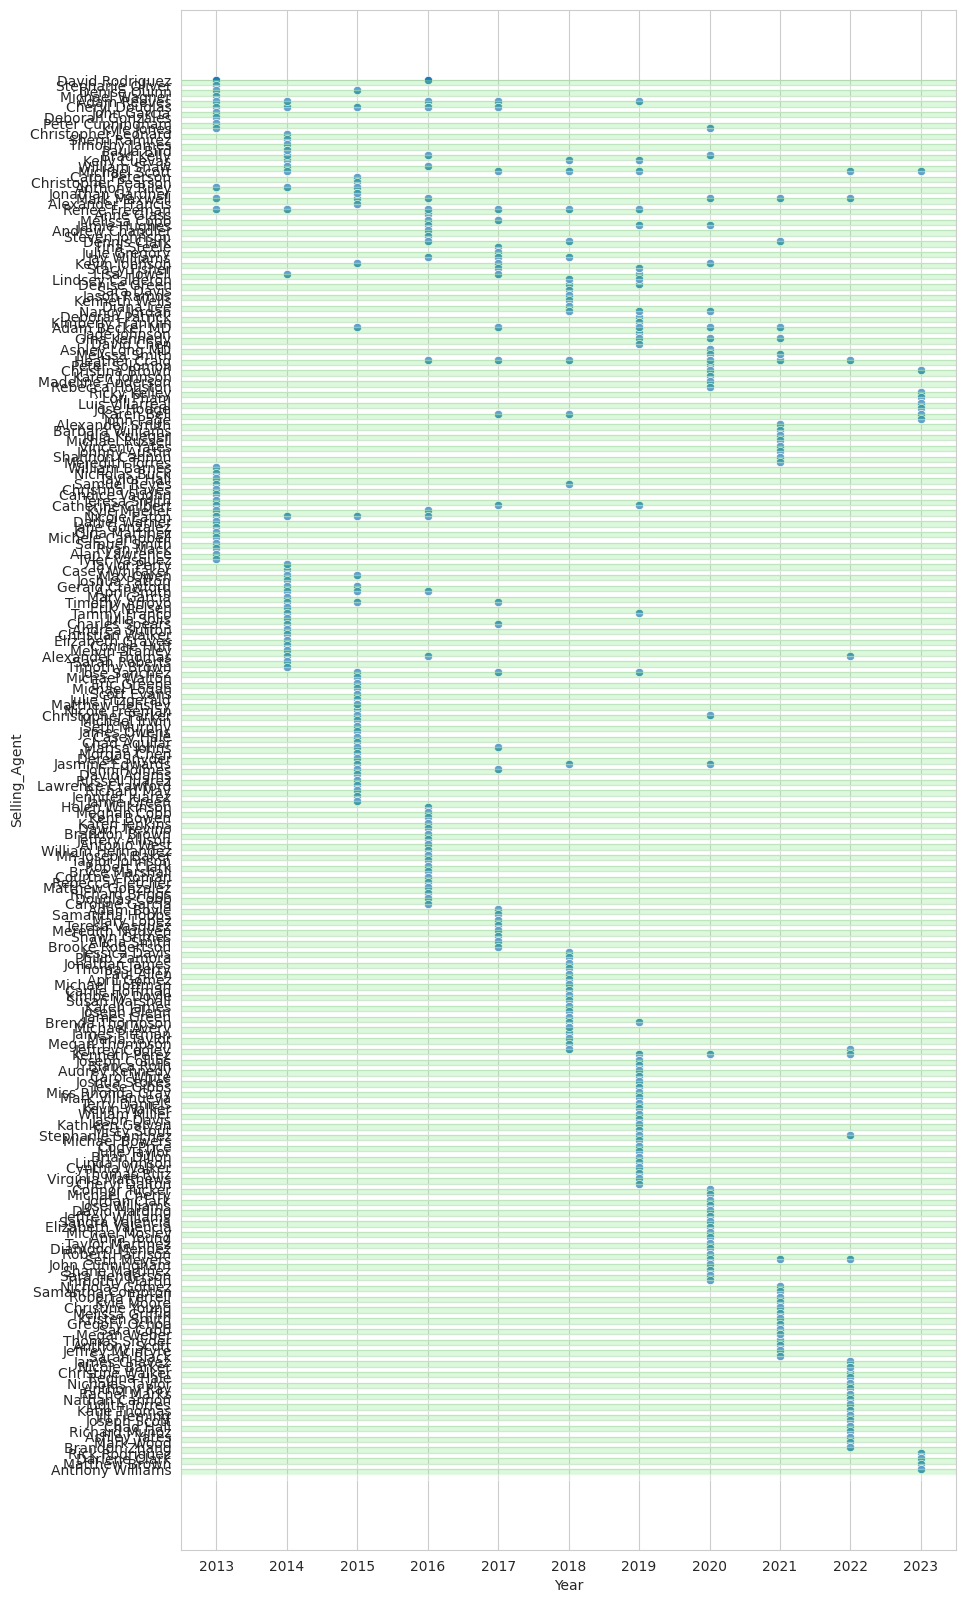

In [73]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create the scatter plot
selling_agents = df
sns.scatterplot(x='Year', y='Selling_Agent', data= selling_agents )

# Set the x tick marks to be every year
plt.xticks(range(2013, 2024))

# Make the plot taller
plt.gcf().set_size_inches(10, 20)

# Define the number of alternating bands and their colors
num_bands = 260  # Change this to the number of desired bands
colors = ['lightgreen', 'white']  # Add more colors as needed

# Iterate through the y-axis range and add alternating bands
for i in range(num_bands):
    band_height = 1  # Height of each band
    band_color = colors[i % len(colors)]  # Alternate the band color
    y_start = i * band_height  # Calculate the starting y-coordinate
    y_end = (i + 1) * band_height  # Calculate the ending y-coordinate
    plt.axhspan(y_start, y_end, alpha=0.3, color=band_color)

plt.show()

Now while these agents are not spectaular in their own whne cobbled together thye out perform a star listting agent.

In [66]:
sorted_Listing_agents

Listing_Agent     Selling_Agent Listing_Date  Year  Agent_Count
50        Adam Reeves    Cheryl Douglas   2013-05-06  2013          107
21   Jonathan Gardner   David Rodriguez   2013-03-05  2013           68
219    Jared Santiago     Michael Scott   2014-11-10  2014           66
39       Mark Maxwell      Denise Quinn   2013-04-15  2013           62
27          Paul Mann  Stephanie Oliver   2013-04-01  2013           53
47   William Williams       Adam Reeves   2013-04-30  2013           51